# 1. Setup Env

In [24]:
# pip install Flask-SQLAlchemy
# pip install ipywidgets   OR  # conda install ipywidgets

# Active jupyter nbextension
# jupyter nbextension enable --py widgetsnbextension

In [29]:
import pandas as pd
#from pandas_alchemy import init_db, DataFrame
from flask_sqlalchemy import SQLAlchemy
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import seaborn as sb

In [11]:
fbData=pd.read_csv("/Users/Sunny_Charlie/Desktop/AI_Project_Code/13_DataMeshNetwork/FB_Data/pseudo_facebook.csv")

In [12]:
fbData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 99003 non-null  int64  
 1   age                    99003 non-null  int64  
 2   dob_day                99003 non-null  int64  
 3   dob_year               99003 non-null  int64  
 4   dob_month              99003 non-null  int64  
 5   gender                 98828 non-null  object 
 6   tenure                 99001 non-null  float64
 7   friend_count           99003 non-null  int64  
 8   friendships_initiated  99003 non-null  int64  
 9   likes                  99003 non-null  int64  
 10  likes_received         99003 non-null  int64  
 11  mobile_likes           99003 non-null  int64  
 12  mobile_likes_received  99003 non-null  int64  
 13  www_likes              99003 non-null  int64  
 14  www_likes_received     99003 non-null  int64  
dtypes:

In [13]:
fbData

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756


In [14]:
fbData.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900300e+04,99003.000000,99003.000000,99003.000000,99003.000000,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,1.597045e+06,37.280224,14.530408,1975.719776,6.283365,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,3.440592e+05,22.589748,9.015606,22.589748,3.529672,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298806e+06,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895744e+06,50.000000,22.000000,1993.000000,9.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,2.193542e+06,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


In [30]:
@interact
def user_age(column='age', x=100):
    return fbData.loc[fbData['age'] > x]

interactive(children=(Text(value='age', description='column'), IntSlider(value=100, description='x', max=300, …

In [31]:
@interact
def user_age(column='friend_count', x=2000):
    return fbData.loc[fbData['friend_count'] > x]

interactive(children=(Text(value='friend_count', description='column'), IntSlider(value=2000, description='x',…

In [48]:
fb_gender = fbData.groupby('gender', as_index=False).sum() 
fb_gender

,gender,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,female,64315395060,1588419,605326,79442883,259068,23637151.0,9740258,4584894,10468106,10121282,6960437,5921399,3507665,4199879
1,male,93520103528,2089349,830938,115820113,362042,29298972.0,9666787,6037023,4959923,3977851,3529747,2391753,1430175,1586098


Text(0.5, 1.0, 'Friend count by Gender')

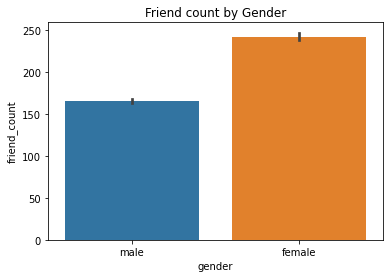

In [35]:
ax =sb.barplot(x='gender', y='friend_count', data=fbData)
ax.set_title('Friend count by Gender')

Text(0.5, 1.0, 'Friend count by Age')

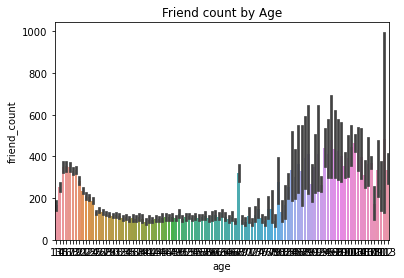

In [42]:
ax =sb.barplot(x='age', y='friend_count', data=fbData)
ax.set_title('Friend count by Age')

Text(0.5, 1.0, 'Likes received by Gender')

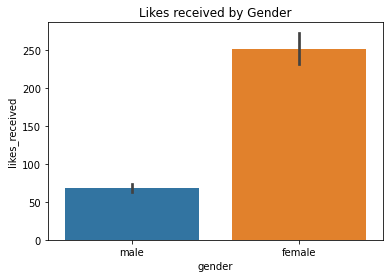

In [39]:
ax =sb.barplot(x='gender', y='likes_received', data=fbData)
ax.set_title('Likes received by Gender')

Text(0.5, 1.0, 'Likes give out by Gender')

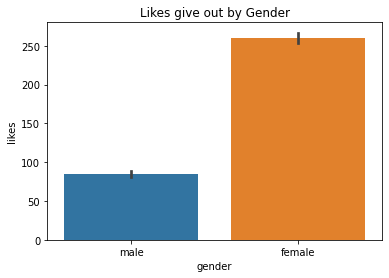

In [40]:
ax =sb.barplot(x='gender', y='likes', data=fbData)
ax.set_title('Likes give out by Gender')

Text(0.5, 1.0, 'Likes give out by Age')

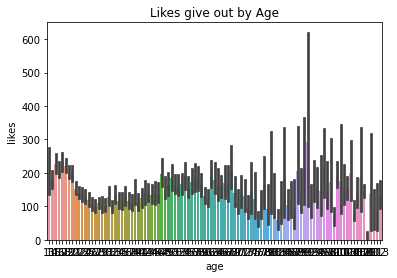

In [46]:
ax =sb.barplot(x='age', y='likes', data=fbData)
ax.set_title('Likes give out by Age')

Text(0.5, 1.0, 'Likes_received by Age')

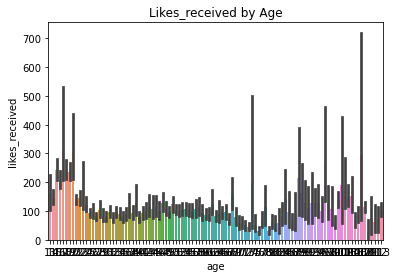

In [47]:
ax =sb.barplot(x='age', y='likes_received', data=fbData)
ax.set_title('Likes_received by Age')

In [28]:
w = widgets.IntSlider(min=10, max=1000)
t = widgets.FloatText()
display(w,t)
mylink = widgets.jslink((w,'userid'), (t, 'age')) #unlink


IntSlider(value=10, max=1000, min=10)

FloatText(value=0.0)

TypeError: No such trait: IntSlider.userid

In [ ]:
from ipywidgets import interactive, interact
from IPython.display import display
@interact
def show_userid(source=fbData[])

In [23]:
fbData.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900300e+04,99003.000000,99003.000000,99003.000000,99003.000000,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,1.597045e+06,37.280224,14.530408,1975.719776,6.283365,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,3.440592e+05,22.589748,9.015606,22.589748,3.529672,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298806e+06,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895744e+06,50.000000,22.000000,1993.000000,9.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,2.193542e+06,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000
